In [57]:
from random import random
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from random import random
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# generate a rectangle with random width and height
def random_rectangle():
	width, height = random(), random()
	points = list()
	# bottom left
	points.append([0.0, 0.0])
	# bottom right
	points.append([width, 0.0])
	# top right
	points.append([width, height])
	# top left
	points.append([0.0, height])
	return points

rect = random_rectangle()
print(rect)

/home/eurismar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/eurismar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


[[0.0, 0.0], [0.8811067812412676, 0.0], [0.8811067812412676, 0.5507260959165113], [0.0, 0.5507260959165113]]


In [13]:
# plot a rectangle
def plot_rectangle(rect):
	# close the rectangle path
	rect.append(rect[0])
	# define path
	codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
	path = Path(rect, codes)
	axis = pyplot.gca()
	patch = PathPatch(path)
	# add shape to plot
	axis.add_patch(patch)
	axis.set_xlim(-0.1,1.1)
	axis.set_ylim(-0.1,1.1)
	pyplot.show()

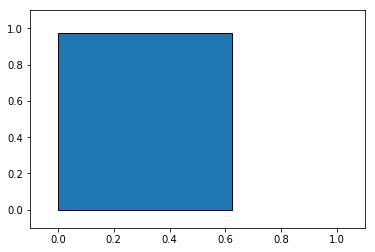

In [40]:
rect = random_rectangle()
plot_rectangle(rect)

In [43]:
# generate input and output sequences for one random rectangle
def get_samples():
	# generate rectangle
	rect = random_rectangle()
	X, y = list(), list()
	# create input output pairs for each coordinate
	for i in range(1, len(rect)):
		X.append(rect[i-1])
		y.append(rect[i])
	# convert input sequence shape to have 1 time step and 2 features
	X, y = array(X), array(y)
	X = X.reshape((X.shape[0], 1, 2))
	return X, y

X, y = get_samples()
for i in range(X.shape[0]):
	print(X[i][0], '=>', y[i])

[0. 0.] => [0.46261316 0.        ]
[0.46261316 0.        ] => [0.46261316 0.18891264]
[0.46261316 0.18891264] => [0.         0.18891264]


In [47]:
r  = random_rectangle()

In [48]:
len(r)

4

In [49]:
r[0]

[0.0, 0.0]

In [50]:
r[1]

[0.9568831728373396, 0.0]

In [51]:
r[2]

[0.9568831728373396, 0.36850251540577783]

In [52]:
r[3]

[0.0, 0.36850251540577783]

In [54]:
for i in range(1, len(rect)):
    print(rect[i-1])

[0.0, 0.0]
[0.7829623169798949, 0.0]
[0.7829623169798949, 0.25228210026084796]


In [55]:
for i in range(1, len(rect)):
    print(rect[i])

[0.7829623169798949, 0.0]
[0.7829623169798949, 0.25228210026084796]
[0.0, 0.25228210026084796]


In [58]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1, 2)))
model.add(Dense(2, activation='linear'))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
# use a fit LSTM model to generate a new rectangle from scratch
def generate_rectangle(model):
	rect = list()
	# use [0,0] to seed the generation process
	last = array([0.0,0.0]).reshape((1, 1, 2))
	rect.append([[y for y in x] for x in last[0]][0])
	# generate the remaining 3 coordinates
	for i in range(3):
		# predict the next coordinate
		yhat = model.predict(last, verbose=0)
		# use this output as input for the next prediction
		last = yhat.reshape((1, 1, 2))
		# store coordinate
		rect.append([[y for y in x] for x in last[0]][0])
	return rect

In [60]:
X, y = get_samples()

In [61]:
X

array([[[0.        , 0.        ]],

       [[0.03814067, 0.        ]],

       [[0.03814067, 0.23108243]]])

In [62]:
y

array([[0.03814067, 0.        ],
       [0.03814067, 0.23108243],
       [0.        , 0.23108243]])

In [89]:
# fit model
for i in range(5):
	X, y = get_samples()
	model.fit(X, y, epochs=1, verbose=2, shuffle=False)

Epoch 1/1
0s - loss: 0.1080
Epoch 1/1
0s - loss: 0.2422
Epoch 1/1
0s - loss: 0.1646
Epoch 1/1
0s - loss: 0.1395
Epoch 1/1
0s - loss: 0.3080


In [90]:
# generate new shapes from scratch
rect = generate_rectangle(model)

In [91]:
rect

[[0.0, 0.0],
 [0.28005522, -0.0012327023],
 [0.4071507, 0.14508438],
 [0.334615, 0.3150713]]

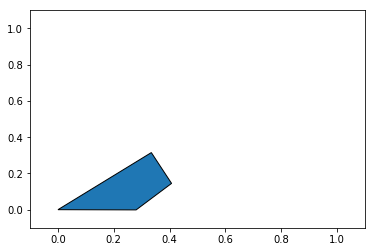

In [92]:
plot_rectangle(rect)